# Importing the libraries

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# reading the dataset

In [86]:
df = pd.read_csv(r'/content/Traffic.csv')

# Exploratory Data Analysis - 1

In [87]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [88]:
df.shape

(2976, 9)

In [89]:
df.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [91]:
#valuecounts for the each column
for column in df.columns:
  print(f"Value counts for column {column}:")
  print(df[column].value_counts())
  print()


Value counts for column Time:
Time
12:00:00 AM    31
12:15:00 AM    31
5:30:00 PM     31
5:15:00 PM     31
5:00:00 PM     31
               ..
7:15:00 AM     31
7:00:00 AM     31
6:45:00 AM     31
6:30:00 AM     31
11:45:00 PM    31
Name: count, Length: 96, dtype: int64

Value counts for column Date:
Date
10    96
26    96
8     96
7     96
6     96
5     96
4     96
3     96
2     96
1     96
31    96
30    96
29    96
28    96
27    96
25    96
11    96
24    96
23    96
22    96
21    96
20    96
19    96
18    96
17    96
16    96
15    96
14    96
13    96
12    96
9     96
Name: count, dtype: int64

Value counts for column Day of the week:
Day of the week
Tuesday      480
Wednesday    480
Thursday     480
Friday       384
Saturday     384
Sunday       384
Monday       384
Name: count, dtype: int64

Value counts for column CarCount:
CarCount
18     110
19      83
15      81
20      75
14      73
      ... 
167      1
154      1
152      1
155      1
163      1
Name: count, Length:

In [92]:
meansOT = ["CarCount", "BikeCount", "BusCount", "TruckCount"]
for mean in meansOT:
    print(mean)
    print(f"Q1, Median, Q3: {np.quantile(df[mean], [0.25, 0.5, 0.75])}")
    print(f"Max and Min: {df[mean].max()} and {df[mean].min()}")
    print(f"Total number of recorded vehicles > 0: {df[mean].loc[df[mean] > 0].sum()}")
    print(f"Total number of counts = 0: {df[mean].loc[df[mean] == 0].count()}")
    print("\n")

CarCount
Q1, Median, Q3: [ 19.  64. 107.]
Max and Min: 180 and 6
Total number of recorded vehicles > 0: 204441
Total number of counts = 0: 0


BikeCount
Q1, Median, Q3: [ 5. 12. 22.]
Max and Min: 70 and 0
Total number of recorded vehicles > 0: 44394
Total number of counts = 0: 145


BusCount
Q1, Median, Q3: [ 1. 12. 25.]
Max and Min: 50 and 0
Total number of recorded vehicles > 0: 45472
Total number of counts = 0: 437


TruckCount
Q1, Median, Q3: [ 6. 14. 23.]
Max and Min: 40 and 0
Total number of recorded vehicles > 0: 45607
Total number of counts = 0: 119




In [94]:
# For sorting based on day of the week and traffic situation
custom_dict = {"Monday": 0, "Tuesday": 1, "Wednesday":2, "Thursday": 3, "Friday": 4, "Saturday": 5, "Sunday": 6}
i = 0
for val in df['Traffic Situation'].unique():
    if val == "low":
        custom_dict[val] = 1
    if val == "normal":
        custom_dict[val] = 2
    if val == "high":
        custom_dict[val] = 3
    if val == "heavy":
        custom_dict[val] = 4

In [96]:
custom_dict

{'Monday': 0,
 'Tuesday': 1,
 'Wednesday': 2,
 'Thursday': 3,
 'Friday': 4,
 'Saturday': 5,
 'Sunday': 6,
 'low': 1,
 'normal': 2,
 'heavy': 4,
 'high': 3}

In [98]:
#Day of the week vs traffic situatuion
grouped_df = df.groupby(["Day of the week", "Traffic Situation"]).sum()[meansOT + ["Total"]]
grouped_df = grouped_df.reset_index(inplace=False)
grouped_df = grouped_df.sort_values(by=["Day of the week", "Traffic Situation"], key=lambda x: x.map(custom_dict))
grouped_df.head(5)

,Day of the week,Traffic Situation,CarCount,BikeCount,BusCount,TruckCount,Total
5,Monday,low,1551,353,186,289,2379
6,Monday,normal,9543,1831,1870,4389,17633
4,Monday,high,3939,727,1053,1058,6777
3,Monday,heavy,10860,2153,3097,477,16587
21,Tuesday,low,1688,272,186,255,2401


# Visualization

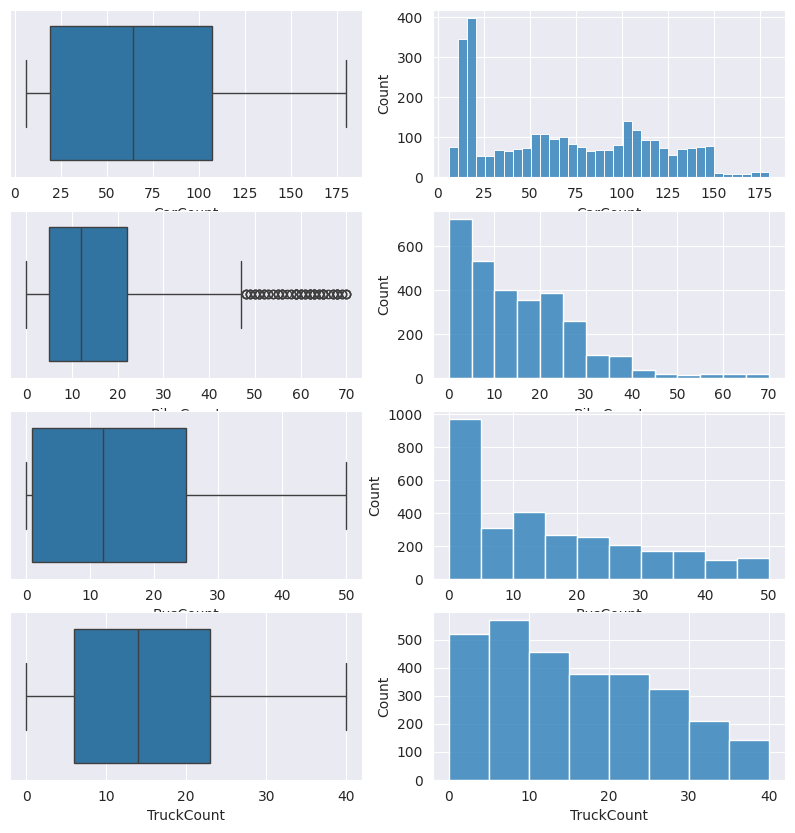

In [138]:
fig,axes = plt.subplots(4,2,figsize=(10,10))
i = 0
j = 0
for col in meansOT:
    ax = sns.boxplot(x=df[col], ax=axes[i][j])
    j += 1
    ax = sns.histplot(df, x=col,binwidth = 5,ax=axes[i][j])
    i += 1
    j -= 1

Text(0.5, 1.0, 'The number of average total transportations for each category of traffic situation')

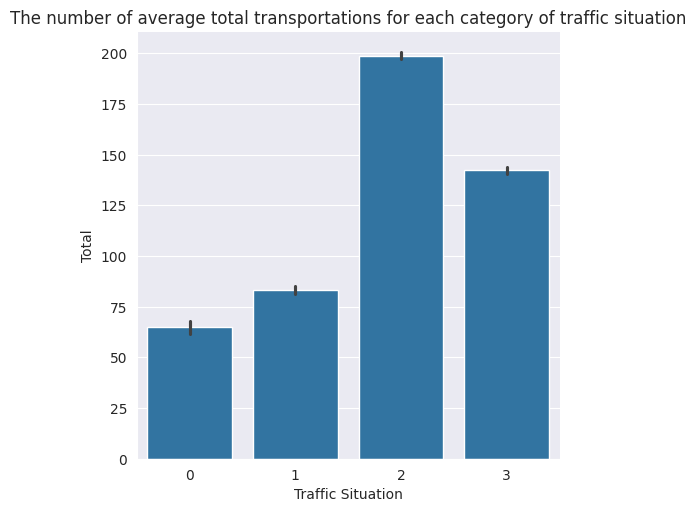

In [139]:
sns.catplot(data=df.copy().sort_values("Traffic Situation", key=lambda x: x.map(custom_dict)), x="Traffic Situation", y="Total", kind="bar")
plt.title("The number of average total transportations for each category of traffic situation")

[Text(0.5, 1.0, 'The trend of traffic situation grouped by days of week')]

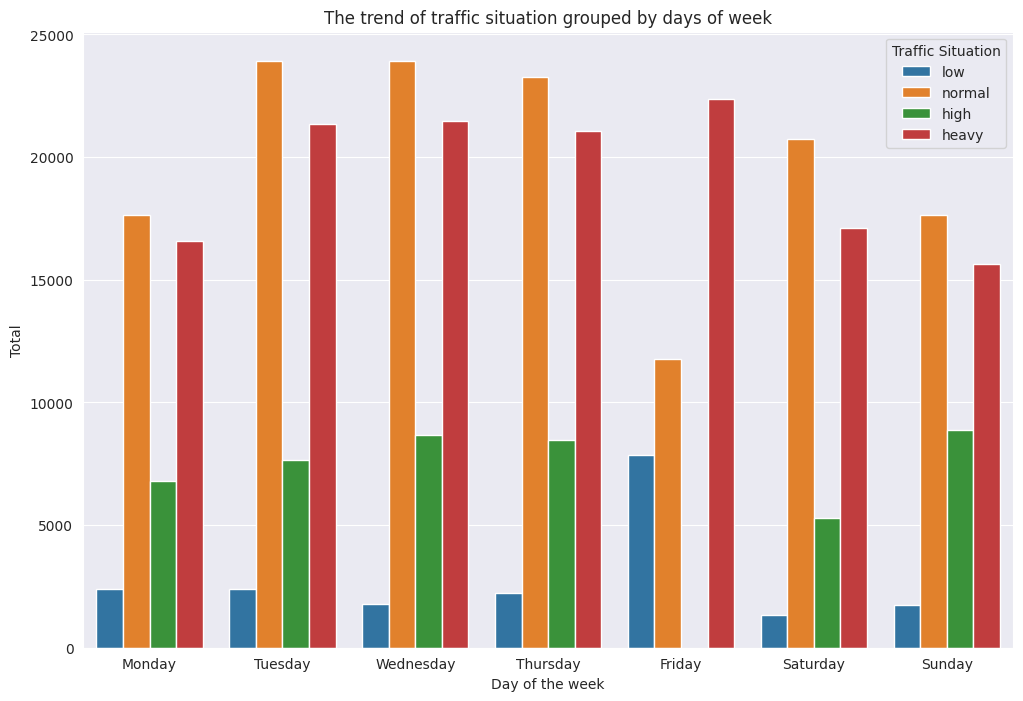

In [99]:
sns.set_style("darkgrid")
fig = plt.subplots(figsize =(12, 8))
sns.barplot(data=grouped_df, x="Day of the week", y="Total", hue="Traffic Situation").set( title="The trend of traffic situation grouped by days of week")

<Axes: xlabel='Day of the week', ylabel='Count'>

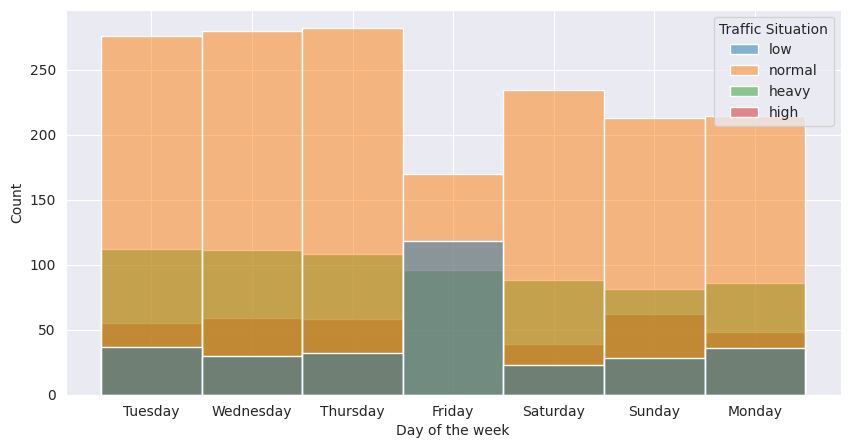

In [100]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="Day of the week", hue="Traffic Situation")

<Axes: xlabel='Date', ylabel='Count'>

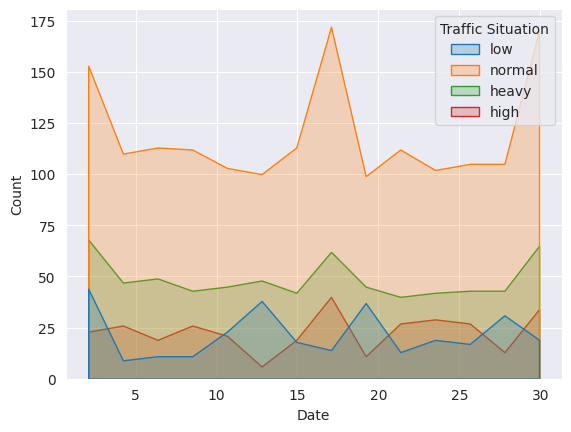

In [101]:
sns.histplot(df, x="Date", hue="Traffic Situation", element="poly")

<Axes: xlabel='Total', ylabel='Count'>

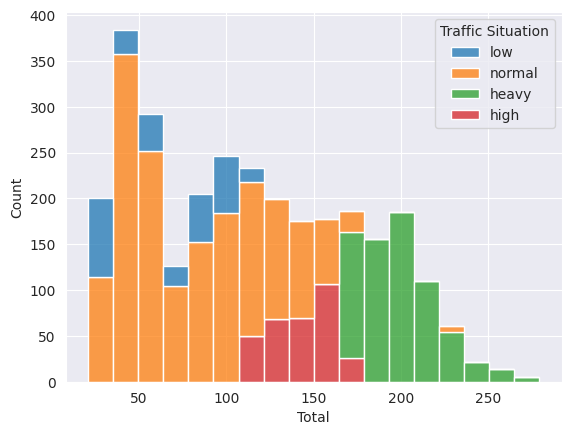

In [102]:
sns.histplot(data=df, x="Total", hue="Traffic Situation", multiple="stack")

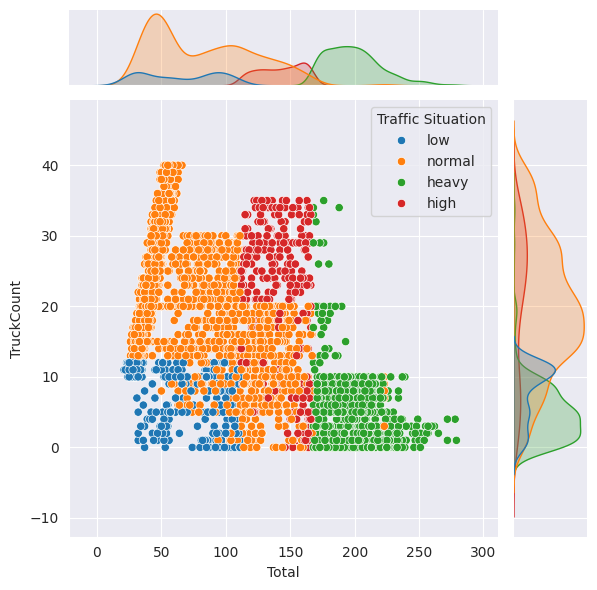

In [103]:
sns.jointplot(data=df, x="Total", y="TruckCount", hue="Traffic Situation")

# Exploratory Data Analysis -2

In [105]:
df['Traffic Situation'].value_counts()

Traffic Situation
normal    1669
heavy      682
high       321
low        304
Name: count, dtype: int64

In [106]:
df['Traffic Situation'] = df['Traffic Situation'].replace({'low':0, 'normal':1, 'heavy':2, 'high':3})

In [107]:
df['Day of the week'].value_counts()

Day of the week
Tuesday      480
Wednesday    480
Thursday     480
Friday       384
Saturday     384
Sunday       384
Monday       384
Name: count, dtype: int64

In [108]:
df['Day of the week'] = df['Day of the week'].replace({'Monday':1,'Tuesday':2,
                                                          'Wednesday':3,'Thursday':4,
                                                          'Friday':5,'Saturday':6,
                                                          'Sunday':7})

In [109]:
test_temp = df.copy()

In [110]:
df.head(2)

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,2,31,0,4,4,39,0
1,12:15:00 AM,10,2,49,0,3,3,55,0


# Feature Engineering

In [111]:
df['hour'] = pd.to_datetime(df['Time']).dt.hour #Hour in separate column
df['minute'] = pd.to_datetime(df['Time']).dt.minute #Minute in separate column
# replace 0 with AM
# replace 1 with PM
df['Temp'] = df['Time'].apply(lambda x: x.split(' ')[1]) #Temporary column for AM/PM
df['AM/PM'] = df['Temp'].replace({'AM':0,'PM':1})

In [112]:
df= df.drop(columns = ['Time','Temp'], axis=1)
df

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,hour,minute,AM/PM
0,10,2,31,0,4,4,39,0,0,0,0
1,10,2,49,0,3,3,55,0,0,15,0
2,10,2,46,0,3,6,55,0,0,30,0
3,10,2,51,0,2,5,58,0,0,45,0
4,10,2,57,6,15,16,94,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2971,9,4,16,3,1,36,56,1,22,45,1
2972,9,4,11,0,1,30,42,1,23,0,1
2973,9,4,15,4,1,25,45,1,23,15,1
2974,9,4,16,5,0,27,48,1,23,30,1


In [113]:
df[['Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'hour', 'minute', 'AM/PM', 'Traffic Situation']].corr()

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,hour,minute,AM/PM,Traffic Situation
Date,1.000000e+00,-1.672874e-02,-0.013453,-0.005089,-0.015536,0.024734,-0.010679,2.814316e-16,2.865092e-17,6.563367e-17,0.006594
Day of the week,-1.672874e-02,1.000000e+00,-0.002230,0.063583,-0.046031,-0.021895,-0.002953,-2.874150e-16,-5.201713e-17,-1.206884e-16,-0.024423
CarCount,-1.345292e-02,-2.230275e-03,1.000000,0.722539,0.692994,-0.628157,0.970443,1.480863e-01,-3.359952e-03,1.026836e-01,0.541331
BikeCount,-5.088914e-03,6.358283e-02,0.722539,1.000000,0.566364,-0.575399,0.797429,1.405488e-01,-7.978481e-03,1.404737e-01,0.407324
BusCount,-1.553604e-02,-4.603119e-02,0.692994,0.566364,1.000000,-0.546931,0.790705,1.657507e-01,-1.615958e-02,1.209151e-01,0.590153
TruckCount,2.473362e-02,-2.189502e-02,-0.628157,-0.575399,-0.546931,1.000000,-0.555471,-1.695231e-02,-1.119745e-03,9.508203e-05,-0.049809
Total,-1.067861e-02,-2.952752e-03,0.970443,0.797429,0.790705,-0.555471,1.000000,1.793136e-01,-8.310162e-03,1.370317e-01,0.631150
hour,2.814316e-16,-2.874150e-16,0.148086,0.140549,0.165751,-0.016952,0.179314,1.000000e+00,-1.003662e-17,8.667781e-01,0.175062
minute,2.865092e-17,-5.201713e-17,-0.003360,-0.007978,-0.016160,-0.001120,-0.008310,-1.003662e-17,1.000000e+00,-6.691275e-18,0.002993
AM/PM,6.563367e-17,-1.206884e-16,0.102684,0.140474,0.120915,0.000095,0.137032,8.667781e-01,-6.691275e-18,1.000000e+00,0.124653


<Axes: >

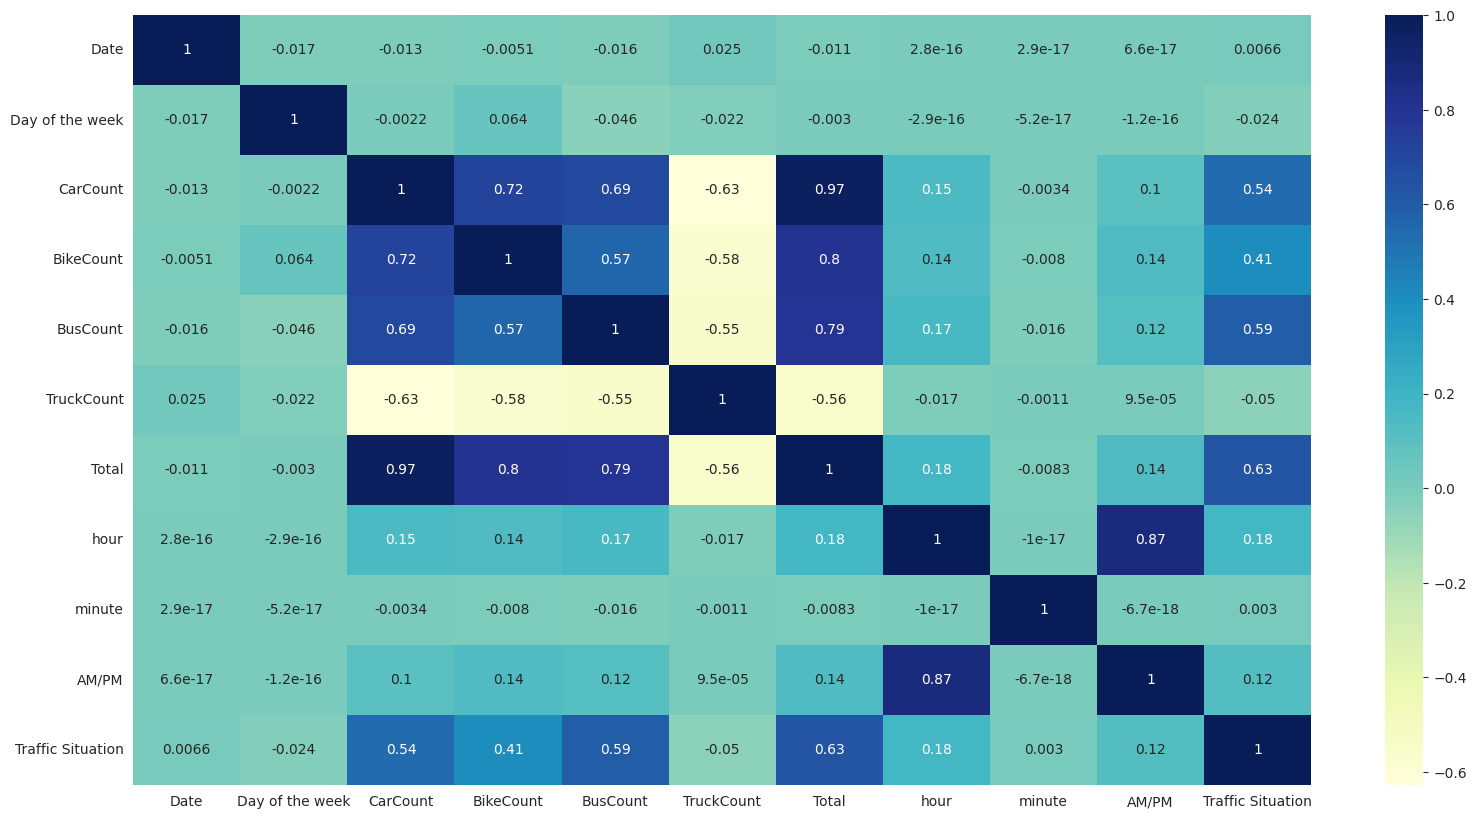

In [114]:
plt.figure(figsize = (19,10))
sns.heatmap(df[['Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
           'TruckCount', 'Total', 'hour', 'minute', 'AM/PM', 'Traffic Situation']].corr(),
            cmap="YlGnBu",annot=True)

In [115]:
df.columns

Index(['Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation', 'hour', 'minute', 'AM/PM'],
      dtype='object')

# splitting of the data

In [118]:
X= df[['Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total','hour', 'minute', 'AM/PM']]

y= df['Traffic Situation'].values

In [119]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2 , random_state = 0)

In [120]:
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

In [121]:
cl1 = LogisticRegression()
cl2 = RandomForestClassifier()
cl3 = SVC(probability=True)
cl4 = XGBClassifier()
cl5 = AdaBoostClassifier()

voting_cl = VotingClassifier(estimators = [('lr',cl1),('rf',cl2),('svc',cl3),
                                          ('xgb',cl4),('ada',cl5)], voting = 'hard')

voting_cl.fit(train_X, train_y)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(probability=True)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('ada', AdaBoostClassifier())])

In [122]:
voting_pred = voting_cl.predict(test_X)
accuracy = accuracy_score(test_y, voting_pred)

# metrics

In [123]:
accuracy

0.9446308724832215

In [124]:
for clf, label in zip([cl1,cl2,cl3,cl4,cl5],['lr','rf','svc','xgb','ada']):
    scores = cross_val_score(clf, train_X, train_y, scoring='accuracy', cv=5)
    print('Accuracy: ', (scores.mean(), label))

Accuracy:  (0.8991596638655462, 'lr')
Accuracy:  (0.9945378151260504, 'rf')
Accuracy:  (0.9147058823529411, 'svc')
Accuracy:  (0.9983193277310924, 'xgb')
Accuracy:  (0.5609243697478992, 'ada')


In [125]:
init_models = {
    'support vector linear' : SVR(kernel='linear'),
    'support vector kernel' : SVR(kernel= 'rbf'),
    'XGBOOST':XGBRegressor(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'LGBM' : LGBMRegressor()
}

In [127]:
R2 = []
models_names = []
for i, (key, model) in enumerate(init_models.items()):
    model.fit(train_X, train_y)
    models_names.append(key)
    R2.append(np.mean(cross_val_score(model, train_X, train_y, cv=5)))
models_scores = pd.DataFrame({'model name':models_names,'R2 score':R2})
models_scores.head(7)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 607
[LightGBM] [Info] Number of data points in the train set: 2380, number of used features: 10
[LightGBM] [Info] Start training from score 1.347059
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

,model name,R2 score
0,support vector linear,0.549698
1,support vector kernel,0.734572
2,XGBOOST,0.998063
3,Decision Tree,0.993382
4,Random Forest,0.994155
5,LGBM,0.989627


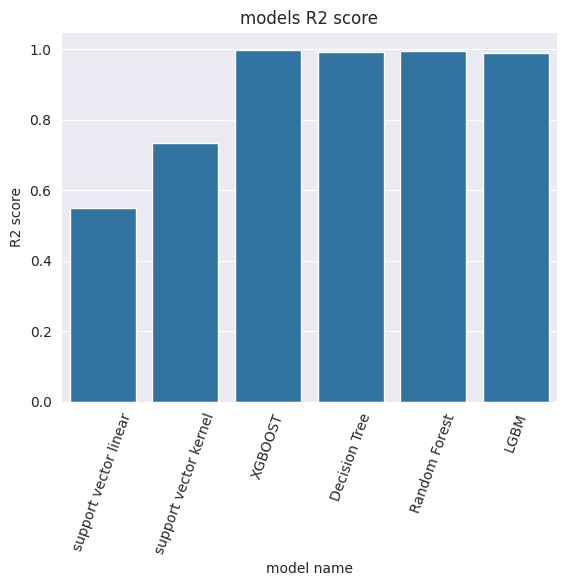

In [128]:
fig, ax = plt.subplots()
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
ax.set_title("models R2 score")
sns.barplot(data=models_scores, x='model name', y="R2 score").set(xticklabels=models_scores['model name'])
plt.show()

In [129]:
#Solo RandomForest Accuracy
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(train_X, train_y)

rfc_pred = rfc.predict(test_X)
accuracy = accuracy_score(test_y, rfc_pred)
accuracy

0.9949664429530202

In [131]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(test_y, xgbc_pred)
conf_matrix

array([[ 64,   0,   0,   0],
       [  0, 334,   0,   0],
       [  0,   0, 138,   0],
       [  0,   0,   0,  60]])

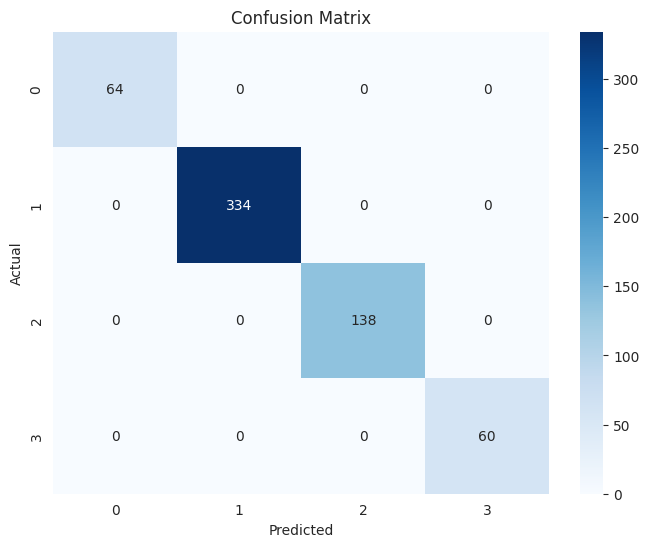

In [132]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(4), yticklabels=range(4))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [137]:
# Generate the prediction code from the model
def predict_traffic_situation(data):
  data = np.array(data)
  data = sc.transform([data])
  prediction = xgbc.predict(data)[0]
  return prediction
#data = [10,2,31,0,4,4,39,0,0,0]
data = [10,2,57,6,15,16,94,1,0,0]
predicted_traffic_situation = predict_traffic_situation(data)
# Print the predicted traffic situation
print(f"Predicted traffic situation: {predicted_traffic_situation}")

Predicted traffic situation: 1


In [135]:
'''X= df[['Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total','hour', 'minute', 'AM/PM']]'''

df.head()

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,hour,minute,AM/PM
0,10,2,31,0,4,4,39,0,0,0,0
1,10,2,49,0,3,3,55,0,0,15,0
2,10,2,46,0,3,6,55,0,0,30,0
3,10,2,51,0,2,5,58,0,0,45,0
4,10,2,57,6,15,16,94,1,1,0,0


In [140]:
import pickle

In [141]:
# Save the model to a file
with open('innovateintern.pkl', 'wb') as file:
    pickle.dump(model, file)